In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras import models
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.layers import Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


## Problem 1: A Detailed View to MNIST Classification

"The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image."([MNIST Database Website](https://www.maths.tcd.ie/~dwilkins/LaTeXPrimer/QuotDash.html))

In [2]:
# Applies seaborn's default style parameters to matplotlib's plots
sns.set()

In [3]:
# Loading Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

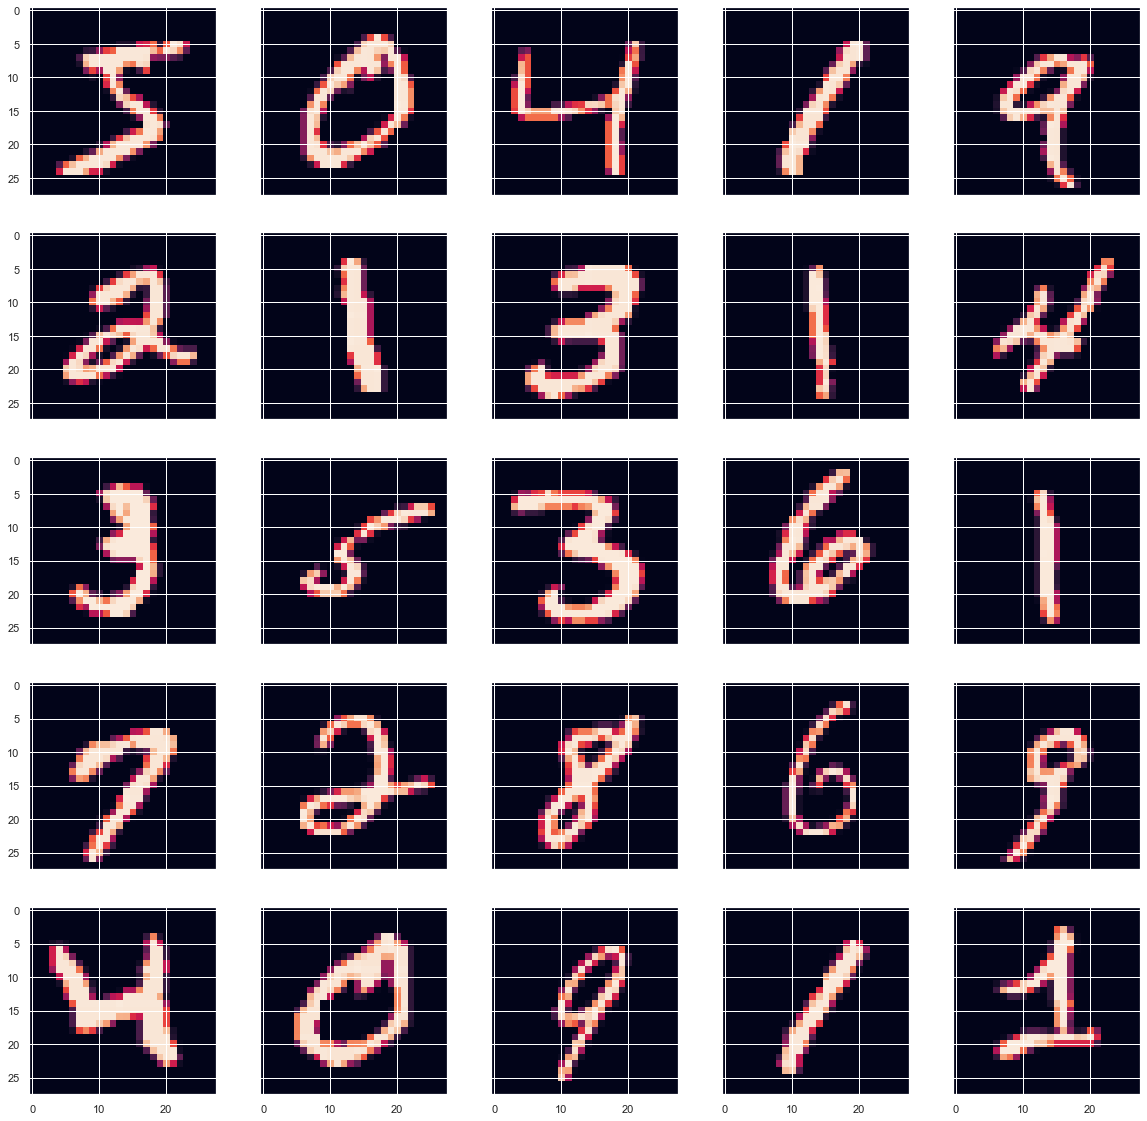

In [4]:
# Looking at first 25 training images
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex='all', sharey='all', figsize = (20,20))
i = 0
#=============================================================================================
# https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
for row in ax:
    for col in row:
        col.imshow(X_train[i])
        i += 1
#=============================================================================================

In [5]:
# Checking some properties of the datasets
print('Number of training examples:', X_train.shape[0])
print('Number of test examples:', X_test.shape[0])
print('Dimensions of each image: ' + str(X_train.shape[1]) + '*' + str(X_train.shape[2]))
print('Minimum pixel intensity in the dataset:', X_train.min())
print('Maximum pixel intensity in the dataset:', X_train.max())
print('Data type:', X_train.dtype)

Number of training examples: 60000
Number of test examples: 10000
Dimensions of each image: 28*28
Minimum pixel intensity in the dataset: 0
Maximum pixel intensity in the dataset: 255
Data type: uint8


In [6]:
# Scaling pixel values so that they are between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [7]:
# Reshaping the 3D image data into 2D
features = 28*28
X_train = np.reshape(X_train, (60000, features))
X_test = np.reshape(X_test, (10000, features))

In [8]:
# One-hot encoding the training and test labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Defining the model
model = Sequential()
model.add(Dense(1024, input_shape = (features,), activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(10, activation='softmax', kernel_initializer = 'he_normal'))

In [10]:
# Model Summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 5,012,490
Trainable params: 5,012,490
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compling the model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [12]:
# Training the model
history = model.fit(X_train, y_train, validation_split=0.1, batch_size = 512, epochs = 50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 19s 354us/step - loss: 0.2905 - acc: 0.9091 - val_loss: 0.1083 - val_acc: 0.9685
Epoch 2/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.0785 - acc: 0.9757 - val_loss: 0.0932 - val_acc: 0.9720
Epoch 3/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.0527 - acc: 0.9831 - val_loss: 0.0802 - val_acc: 0.9757
Epoch 4/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.0386 - acc: 0.9878 - val_loss: 0.0913 - val_acc: 0.9743
Epoch 5/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.0297 - acc: 0.9904 - val_loss: 0.0783 - val_acc: 0.9773
Epoch 6/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0774 - val_acc: 0.9815
Epoch 7/50
54000/54000 [========

In [13]:
# Evaluating the model on test data
score = model.evaluate(X_test, y_test)
print('Loss:', score[0])
print('Accuracy:'+str(score[1]*100)+'%')

10000/10000 [==============================] - 0s 46us/step
Loss: 0.09427238381903867
Accuracy:98.37%


In [14]:
# Storing the output of each layer
# Code taken from the book "Deep Learning with Python by Francois Chollet"
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(X_test[:1000])

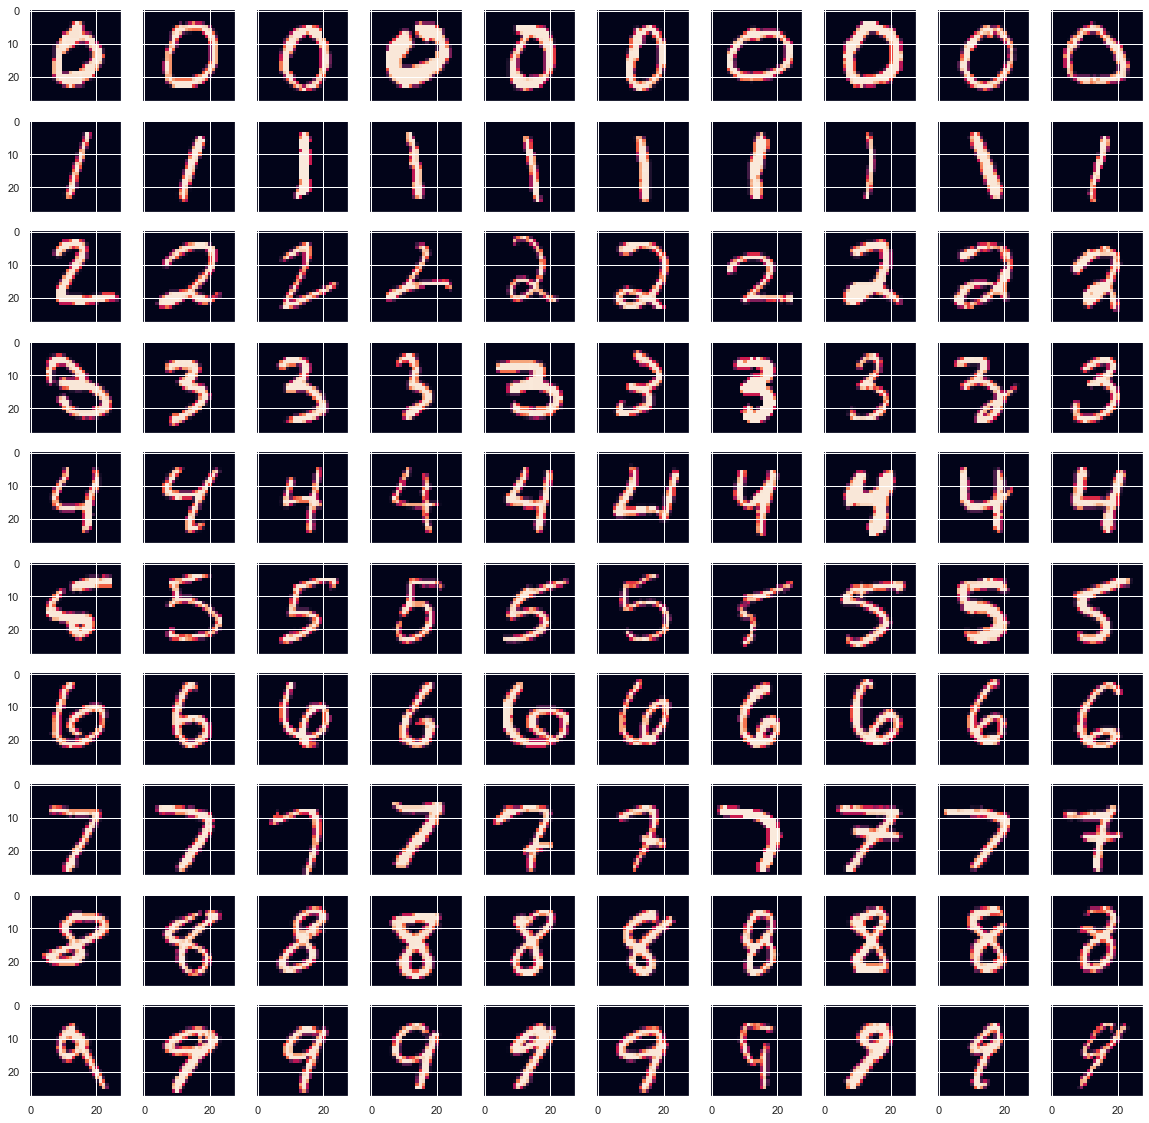

In [15]:
# Plotting the output of last layer for first 1000 test data points in a 10 x 10 grid
# such that the first row contains the test images for which the first dimension of
# output layer has highest probability, the second row contains the test images for 
# which the second dimension of output layer has highest probability and so on.
counter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fig, ax = plt.subplots(nrows = 10, ncols = 10, sharex='all', sharey='all', figsize = (20,20))
for i in range(1000):
    row = activations[-1][i].argmax()
    col = counter[row]
    if col <= 9:
        counter[row] += 1
        ax[row][col].imshow(X_test[i].reshape(28,28))

Since the model is highly accurate(>98% test accuracy), it does a very good job in correctly predicting the first 1000 test images as you can see in the figure above.  
**Note:** Sometimes a five appears as the first element in the 7<sup>th</sup> row (that is, the row for 6's) even when the test accuracy is >98%. The image of that 5 is highly confusing and looks a little like 6 and that's why the network might be misclassifying it as 6.

Dimensions Choosen: [389  81 717 139 838 525 450 937 231 977]


<Figure size 432x288 with 0 Axes>

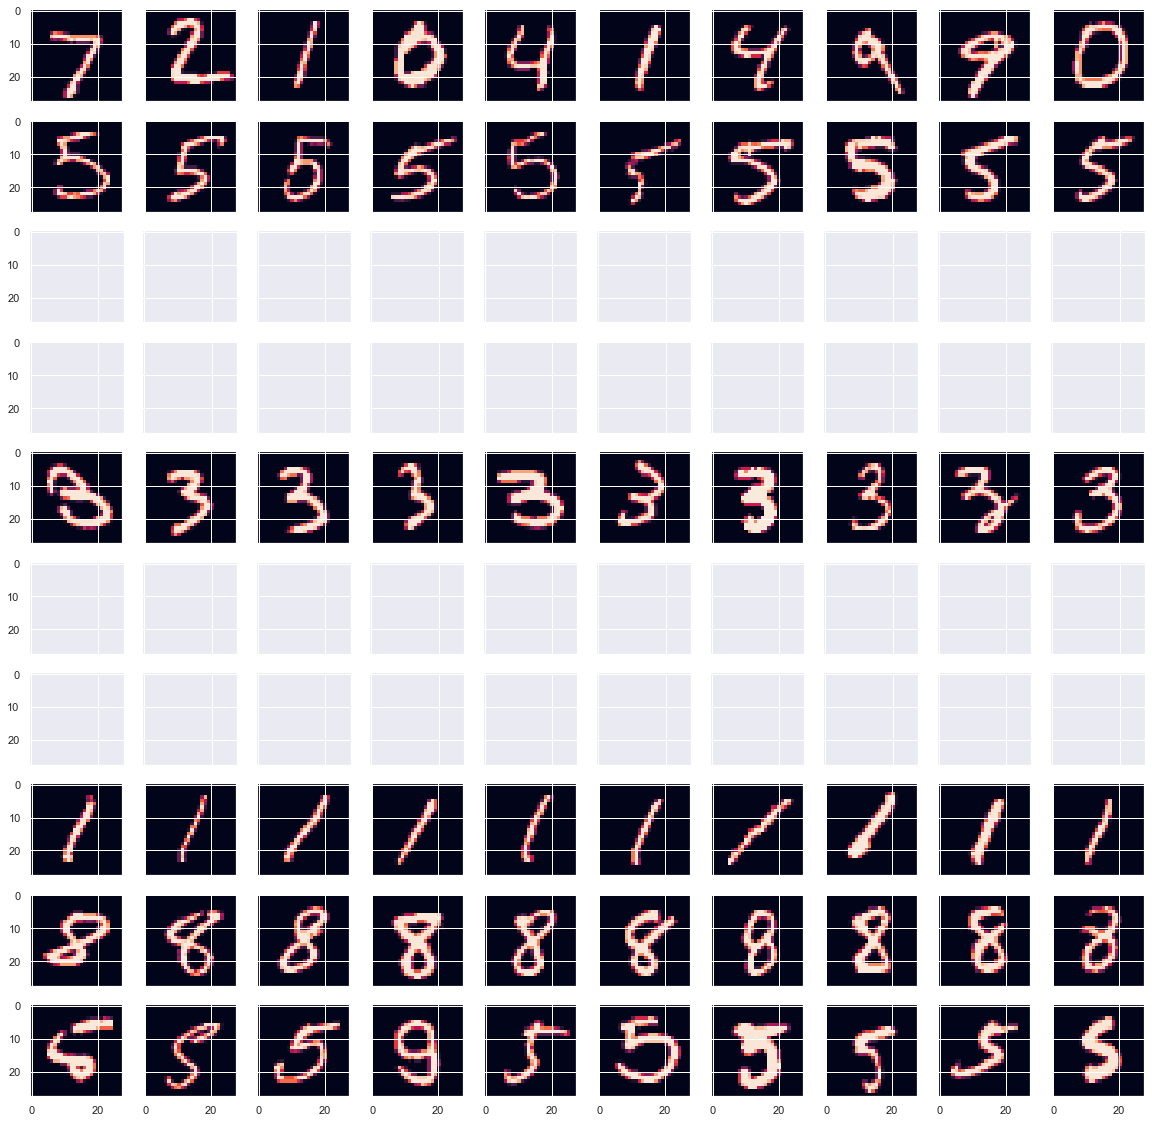

In [16]:
# Plotting the output of second last(fifth) layer, by randomly choosing 10 dimensions, 
# for first 1000 test data points in a 10 x 10 grid
plt.clf()
dim = np.random.choice(np.arange(1000), size = (10))
print('Dimensions Choosen:', dim)
counter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fig, ax = plt.subplots(nrows = 10, ncols = 10, sharex='all', sharey='all', figsize = (20,20))
for i in range(1000):
    elems = np.array([activations[-2][i][j] for j in dim])
    row = elems.argmax()
    col = counter[row]
    if col <= 9:
        counter[row] += 1
        ax[row][col].imshow(X_test[i].reshape(28,28))

We can see by comparing the above figure with one before it, that each row no longer contains test images that belong to the same class. We also observe that some rows are empty. As we get deeper in the network, the layers learn higher level features. For example, the first layer might learn about certain strokes, whereas the fifth layer might have learned some characteristic shapes. The classification power of second to last layer is not as good as that of last layer and hence not all rows contain the images of same class. We do encounter dimensions such that they are active only for images of one class but most of the other neurons are either dead(inactive) or dominated by images of two or more classes.  
<br/>
I think that this is a very good situation. There are dimensions which have learned important shapes in the images and there are some dimensions which do not activate for image of any of the classes making the network sparser. As we learned in class, sparsity implies that the network has learned more meaningful features. The templates/patterns learned in this layer are then combined in the output layer to correctly classify the images correctly.  
**Note:** The only anomaly in this layer, that I observed, is that some dimensions activate only for specific images. I don't know whether this is good or bad. 

### Dimensionality Reduction and Visualization

In this section we perform dimensionality reduction on raw input images as well as represenation of images at each layer and plot them using scatter plots. Dimensionality reduction is performed using one of the two methods:
1. Principal Component Analysis: Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. If there are n observations with p variables, then the number of distinct principal components is min(n-1,p). This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set.
[[wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)]
2. t-Distributed Stochastic Neighbour Embedding: T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning algorithm for visualization. It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.[[wikipedia](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)]  

I have used scikit-learn's implementation of both the methods here.

In [17]:
# Function to plot low dimensional data
def plotData(data, method):
    """
    This function is used to plot high dimensional data by reducing it's dimension using specified method
    data: This argument specifies the data to use for plotting
    method: This argument specifies the method to use for dimensionality reduction of data.
            It can take two values 'PCA' and 'tSNE'.
    """
    
    plt.clf()
    if method == 'PCA':
        pca = PCA(n_components=2)
        transformed_data = pca.fit_transform(data)
    else:
        tsne = TSNE(n_components=2)
        transformed_data = tsne.fit_transform(data)
    # Reversing one hot encoding of test labels for first 1000 data points
    label = np.argmax(y_test[:1000], axis = -1)
    # Defining the colors to use for different classes
    colors = {0: '#000080', 1: 'red', 2: 'blue', 3: 'green', 4: 'brown', 5: 'm', 6: 'c', 7: 'y', 8: '#800080', 9: '#C0C0C0'}
    df = pd.DataFrame(transformed_data, columns=['A', 'B'])
    df['label'] = label
    mean = df.groupby(df['label']).mean()
    plt.figure(figsize=(20,20))
    plt.scatter(df['A'], df['B'], color = df['label'].apply(lambda x: colors[x]), s = 100)
    for label in mean.index:
        plt.text(mean.iloc[label, 0], mean.iloc[label, 1], s=str(label), fontdict={'weight': 'bold', 'size': 30})

    if method == 'PCA':
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
    else:
        plt.xlabel('First Dimension')
        plt.ylabel('Second Dimension')
    plt.show()

#### For Raw Test Images
We can see in the figures above, that performing dimensionality reduction on raw images does not yeild much seperation between classes and hence the samples are not easy to classify. Although the results of tSNE are better than PCA, we still see some overlaps between images of different classes.

<Figure size 432x288 with 0 Axes>

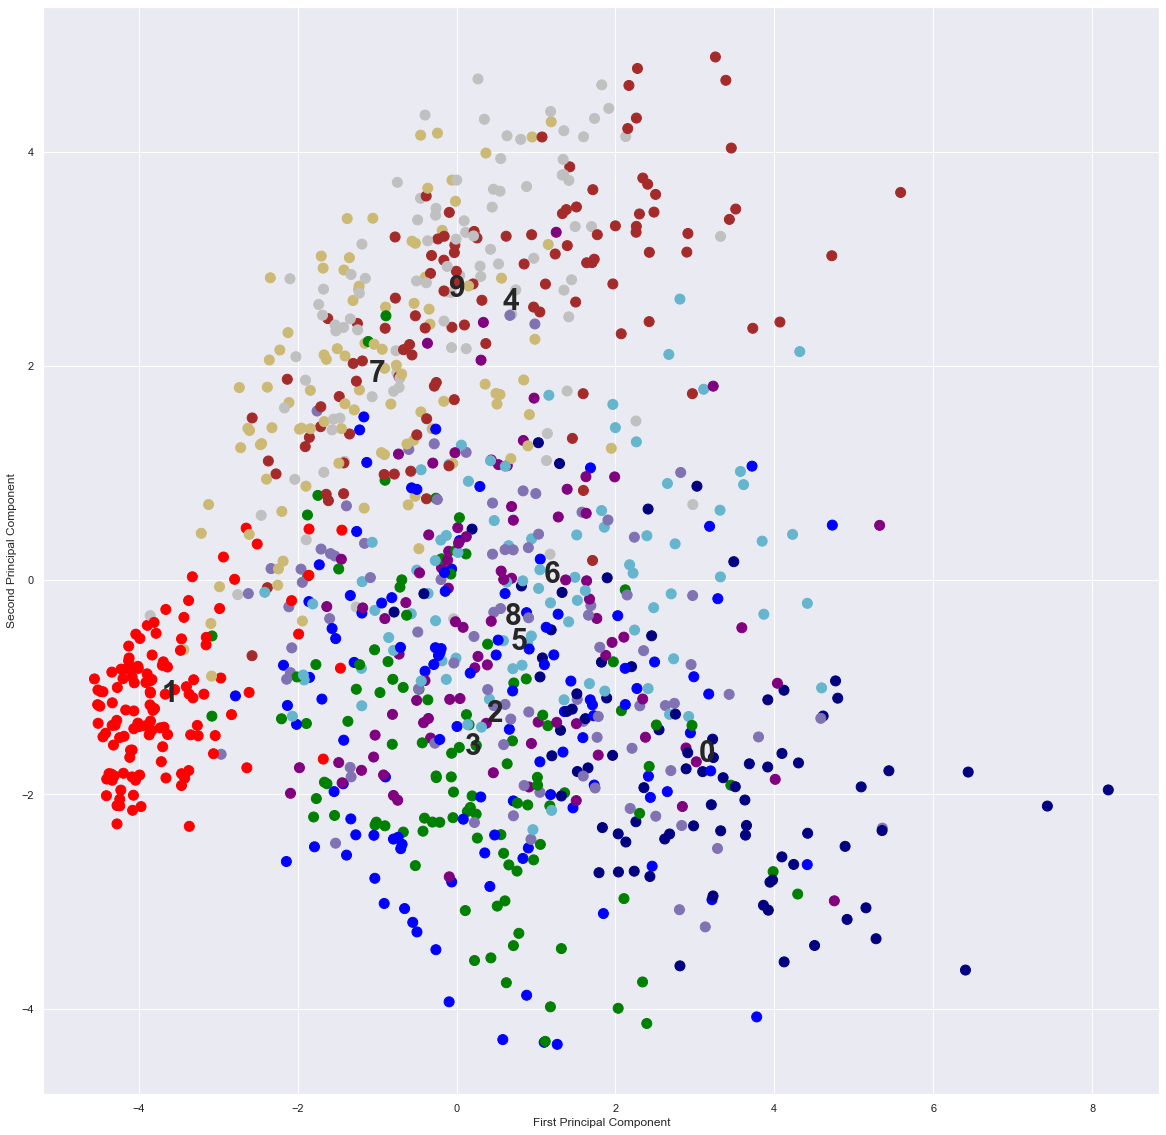

In [18]:
# Plotting the first 1000 test data points reduced to two dimensions using PCA
plotData(X_test[:1000], 'PCA')

<Figure size 432x288 with 0 Axes>

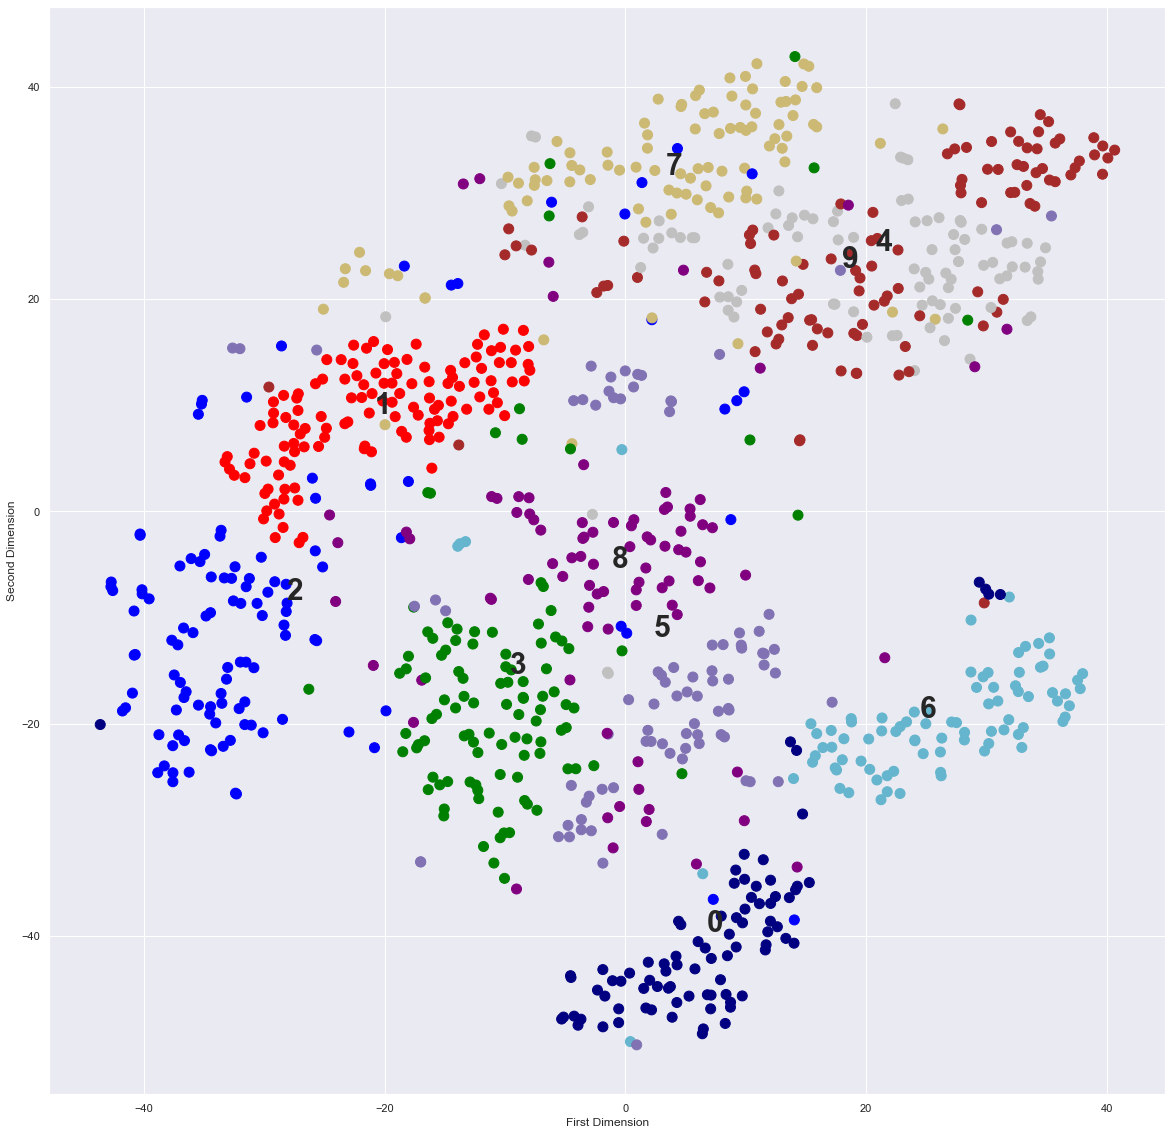

In [19]:
# Plotting the first 1000 test data points reduced to two dimensions using tSNE
plotData(X_test[:1000], 'tSNE')

#### First Hidden Layer
Dimensionality reduction on first layer of network using PCA does not produce a very good sepeartion between classes but the result from tSNE is much better. Almost all the classes are seperable and even if there is some overlap it is very low. 

<Figure size 432x288 with 0 Axes>

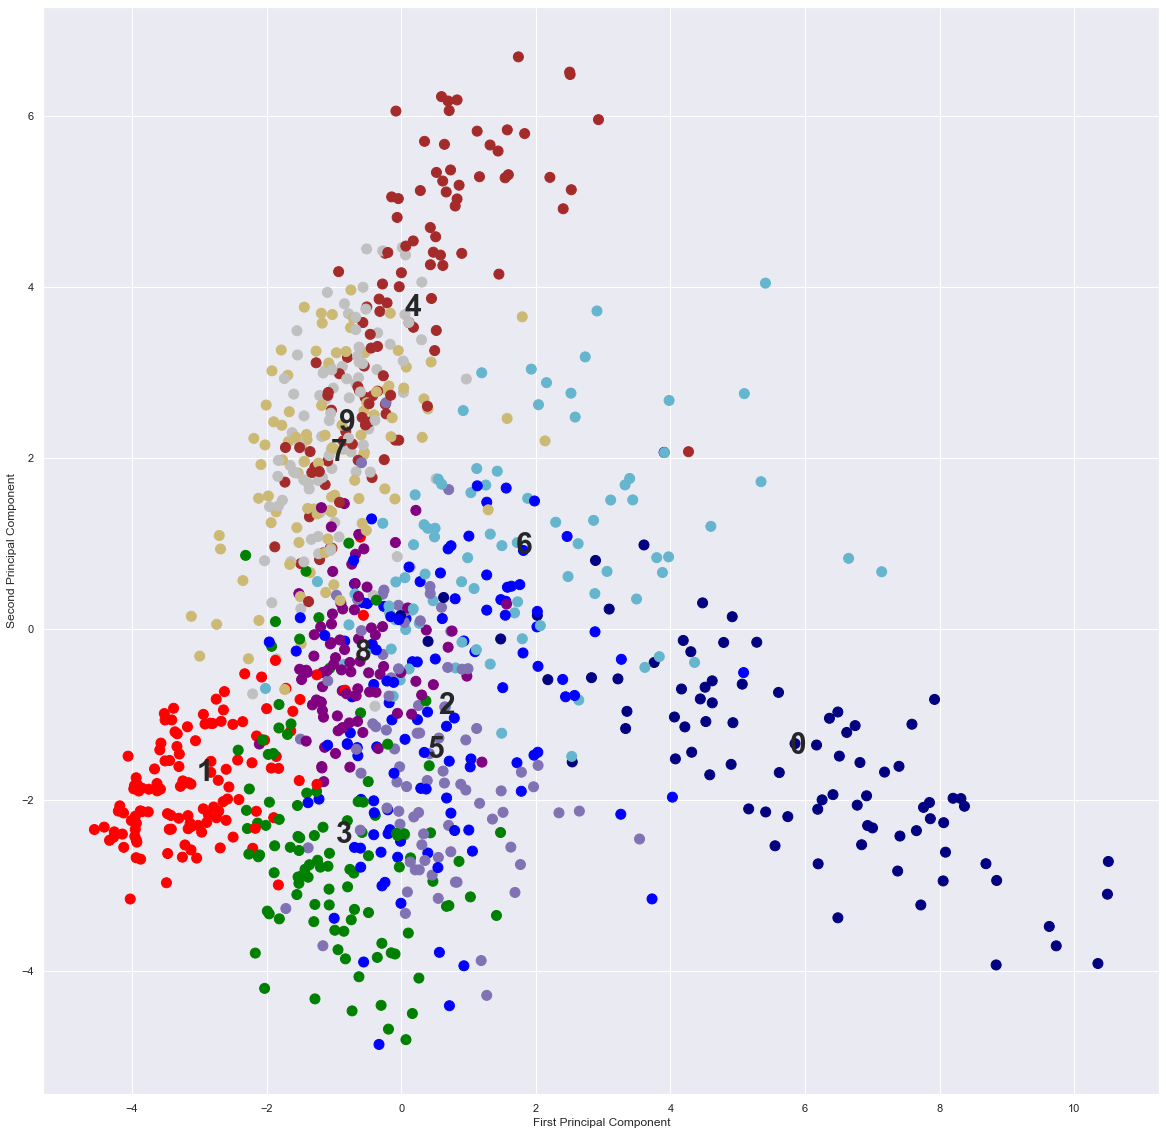

In [20]:
# Plotting the output of first layer, for first 1000 test data points, reduced to two dimensions using PCA
plotData(activations[0], 'PCA')

<Figure size 432x288 with 0 Axes>

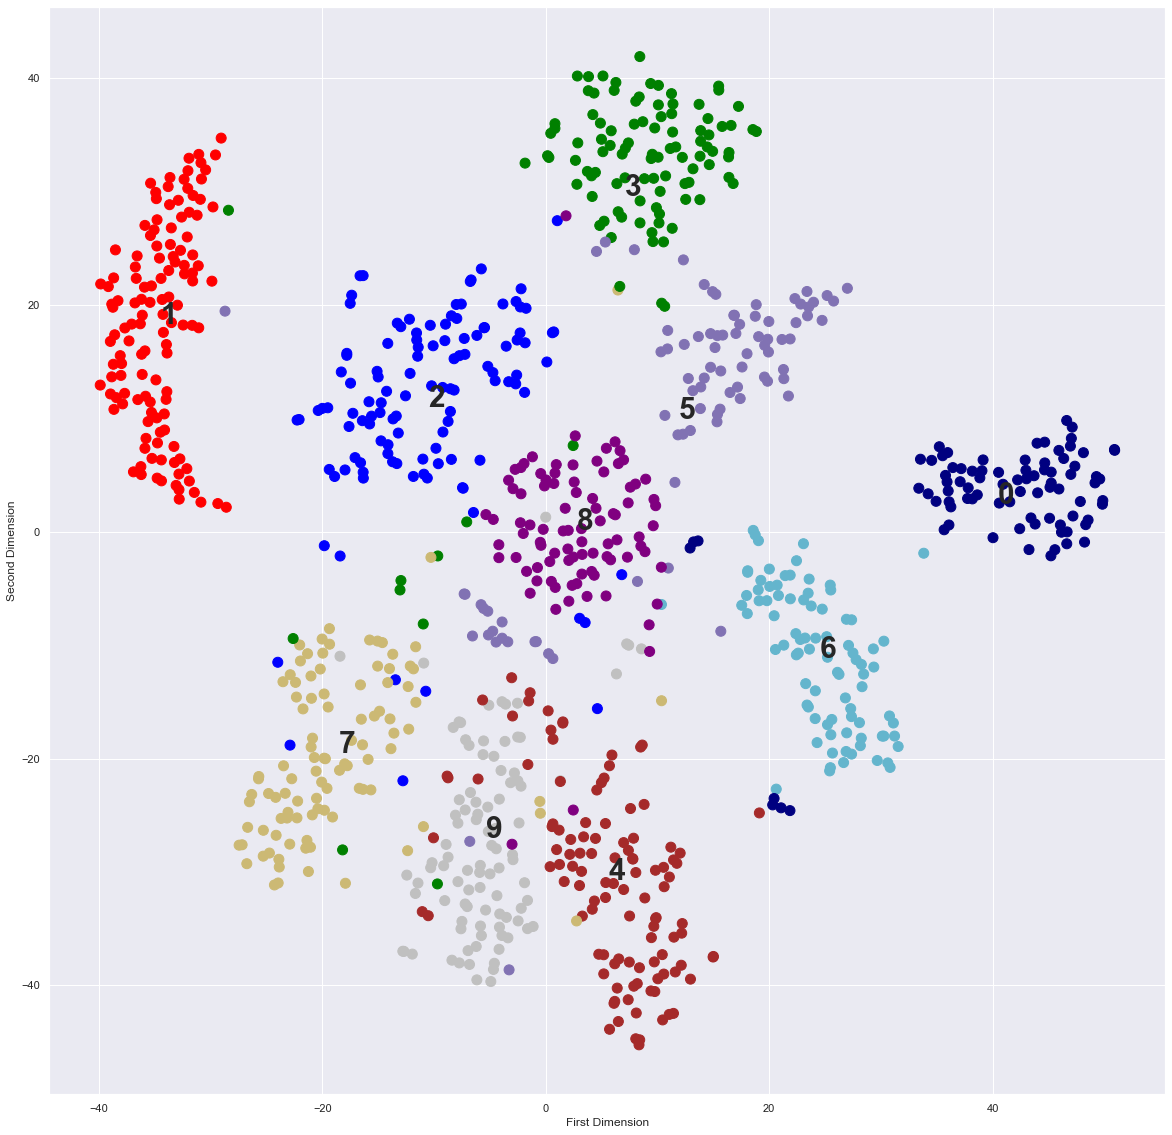

In [21]:
# Plotting the output of first hidden layer, for first 1000 test data points, reduced to two dimensions using tSNE
plotData(activations[0], 'tSNE')

#### Second Layer
The result of PCA still isn't very good. Some classes seem to have seperated out but still there isn't clear seperation between most of the classes. But we do see formation of clusters for each class. As before, the result of tSNE are better for second layer than for first layer. 

<Figure size 432x288 with 0 Axes>

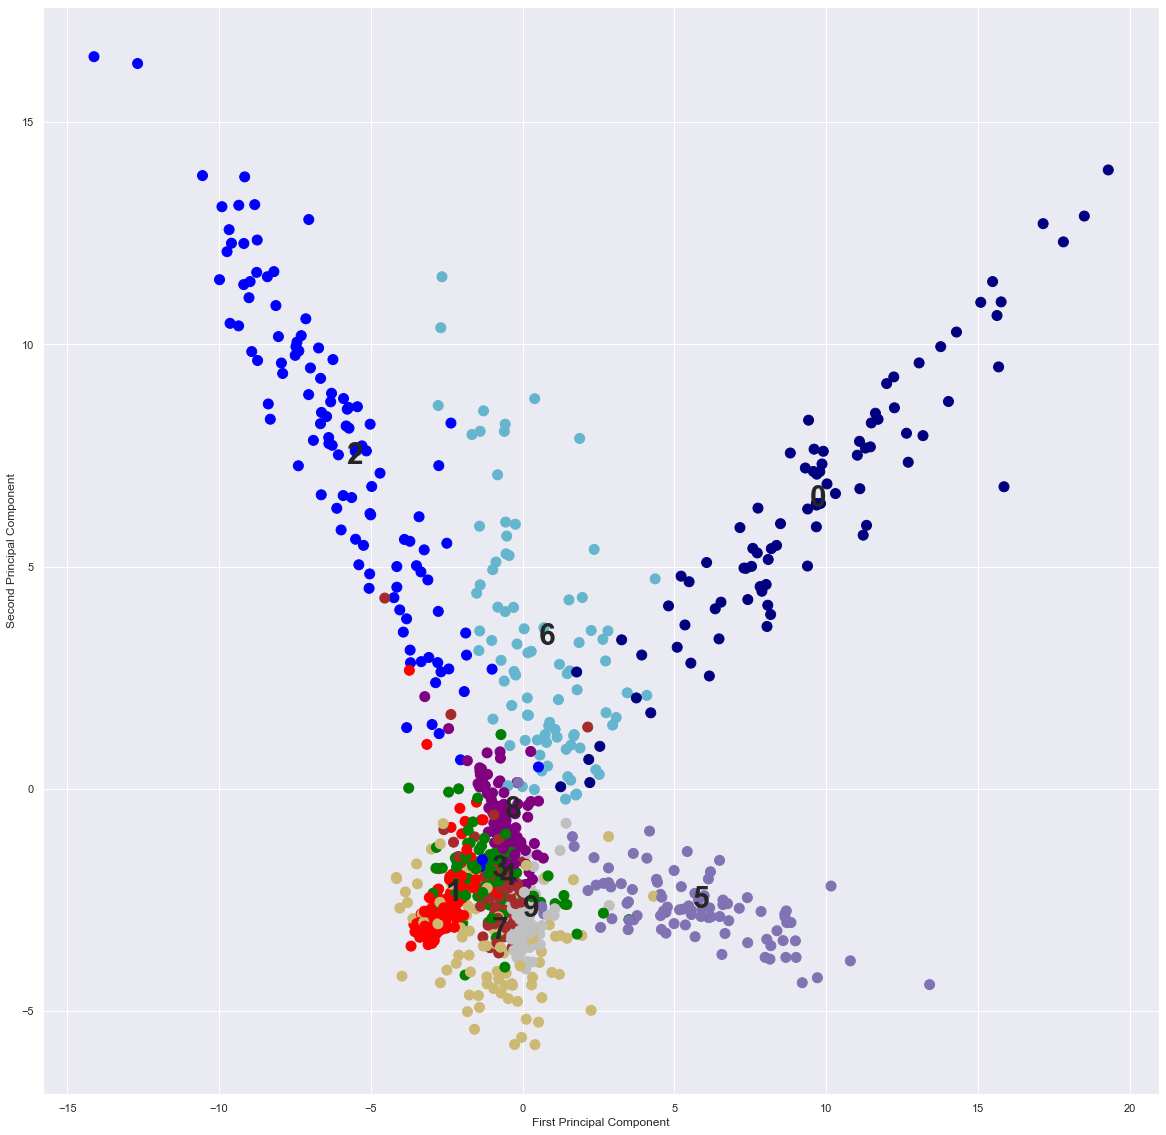

In [22]:
# Plotting the output of second hidden layer, for first 1000 test data points, reduced to two dimensions using PCA
plotData(activations[1], 'PCA')

<Figure size 432x288 with 0 Axes>

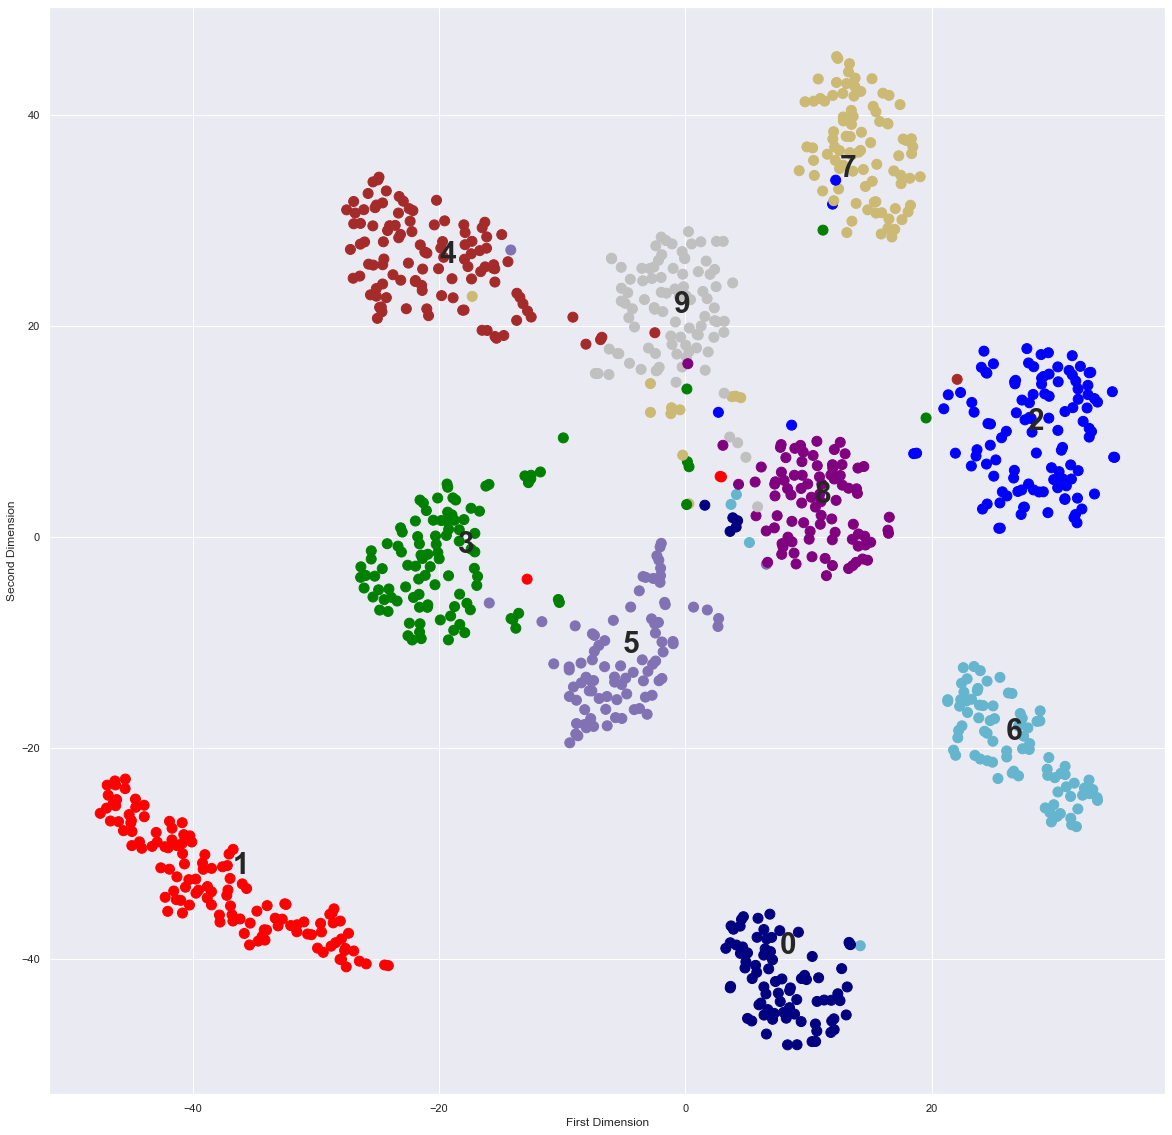

In [23]:
# Plotting the output of second hidden layer, for first 1000 test data points, reduced to two dimensions using tSNE
plotData(activations[1], 'tSNE')

#### Third Layer
The result from PCA is still not good. There's no clear seperation between classes but the clusters are becoming more well defined and it seems they are converging to a single point. Like before, the result of tSNE is becoming better. Images belonging to each class have formed a proper cluster and each cluster is at a fair distance away from others. 

<Figure size 432x288 with 0 Axes>

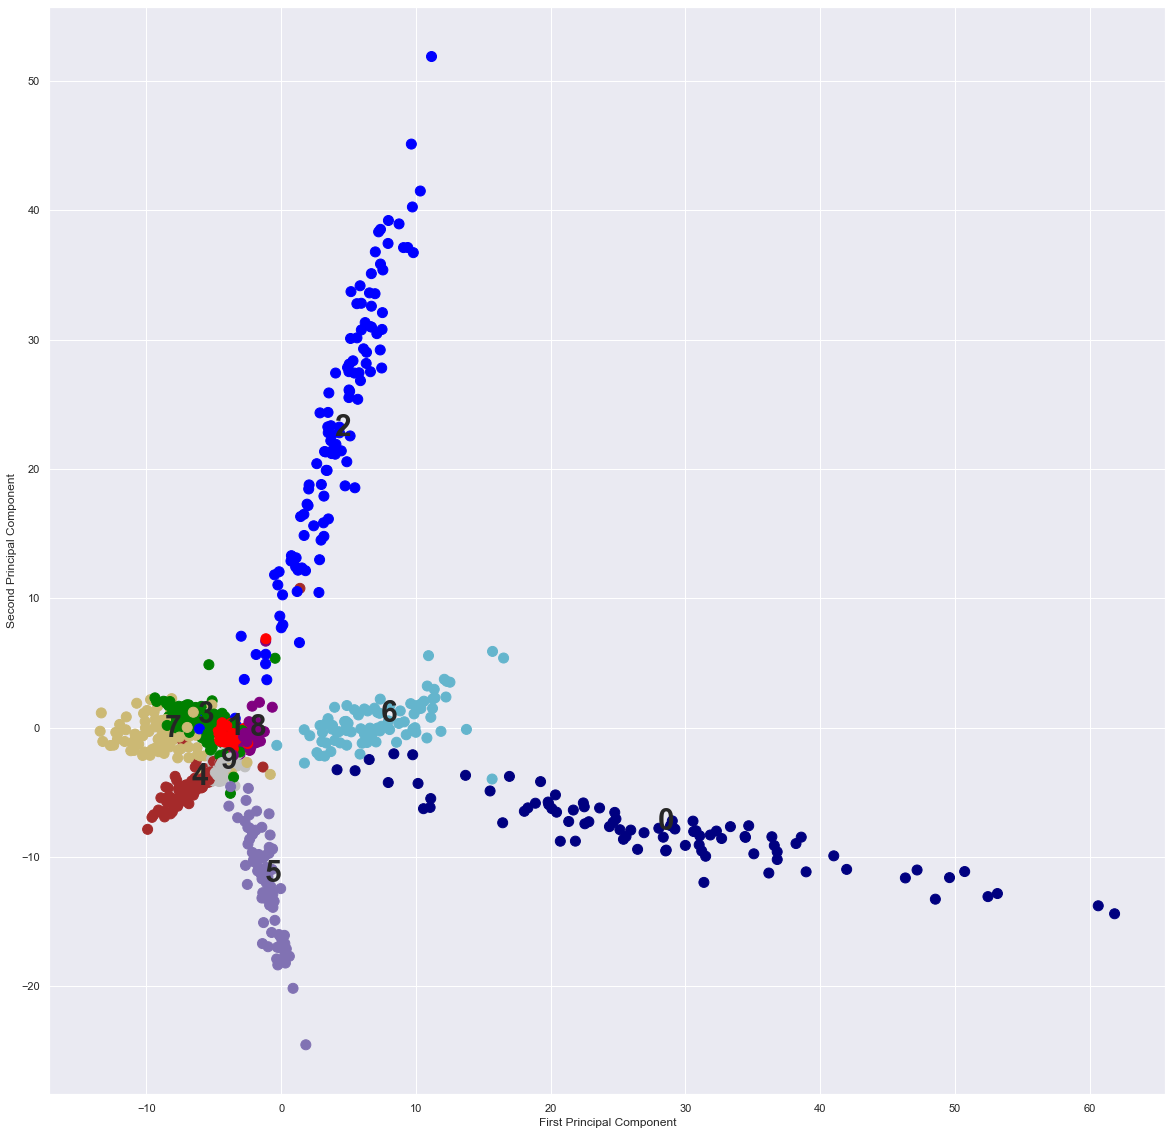

In [24]:
# Plotting the output of third hidden layer, for first 1000 test data points, reduced to two dimensions using PCA
plotData(activations[2], 'PCA')

<Figure size 432x288 with 0 Axes>

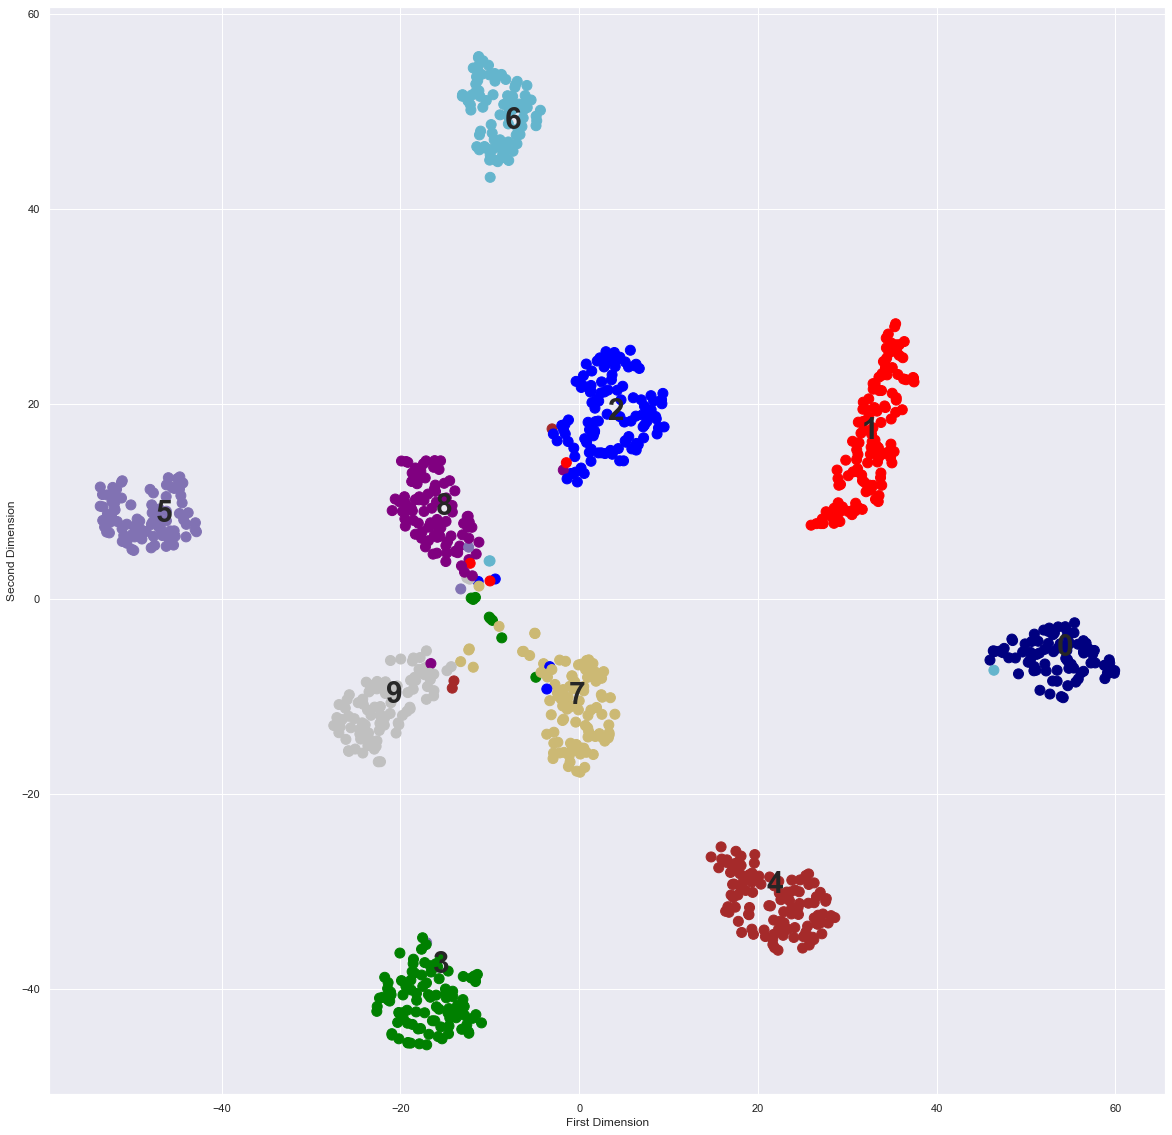

In [25]:
# Plotting the output of third hidden layer, for first 1000 test data points, reduced to two dimensions using tSNE
plotData(activations[2], 'tSNE')

#### Fourth Layer

<Figure size 432x288 with 0 Axes>

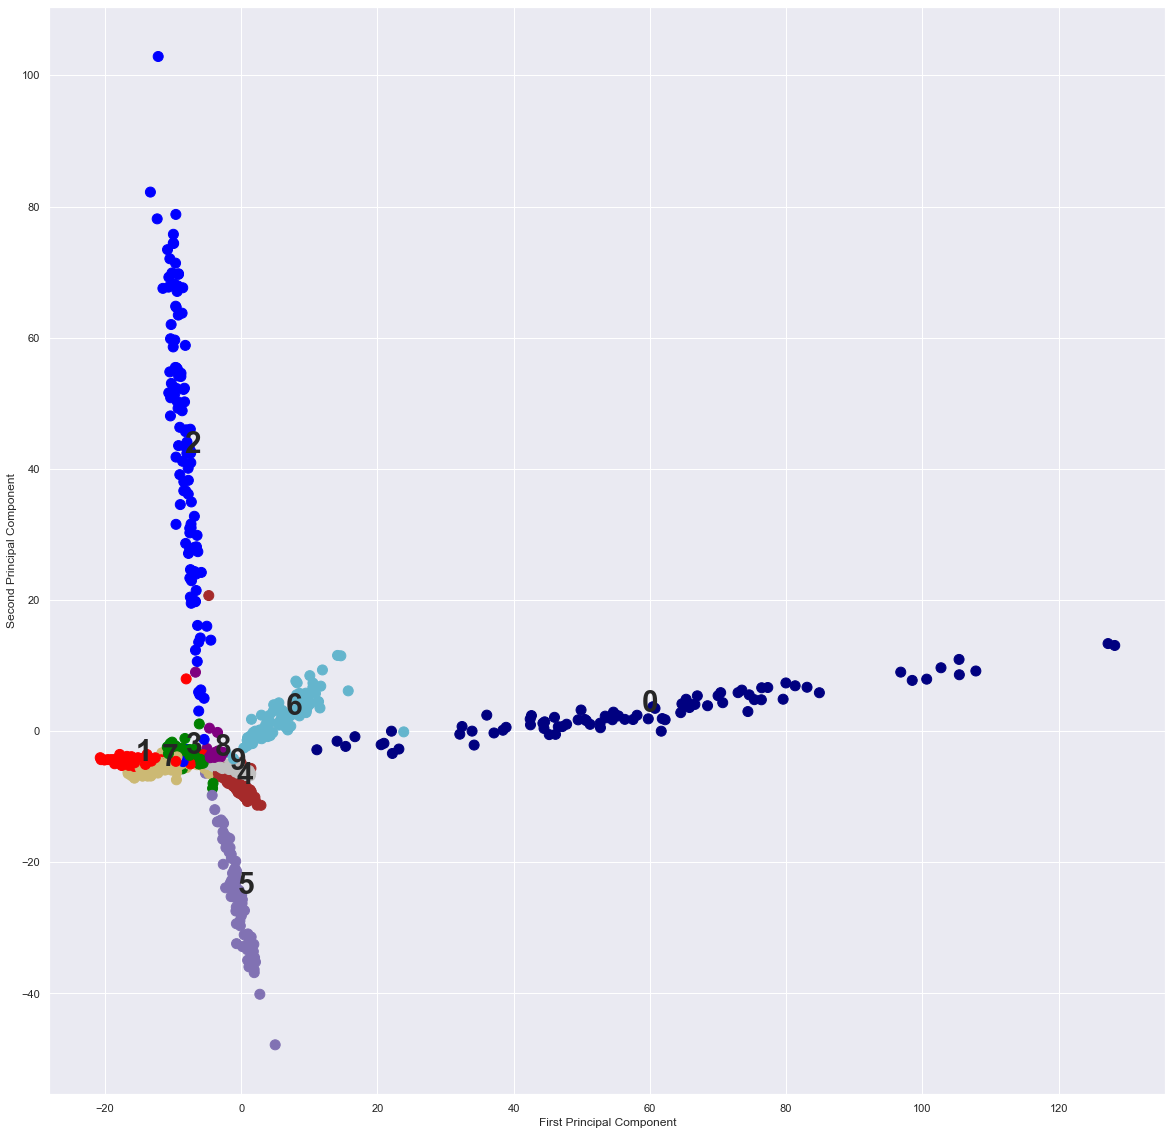

In [26]:
# Plotting the output of fourth hidden layer, for first 1000 test data points, reduced to two dimensions using PCA
plotData(activations[3], 'PCA')

<Figure size 432x288 with 0 Axes>

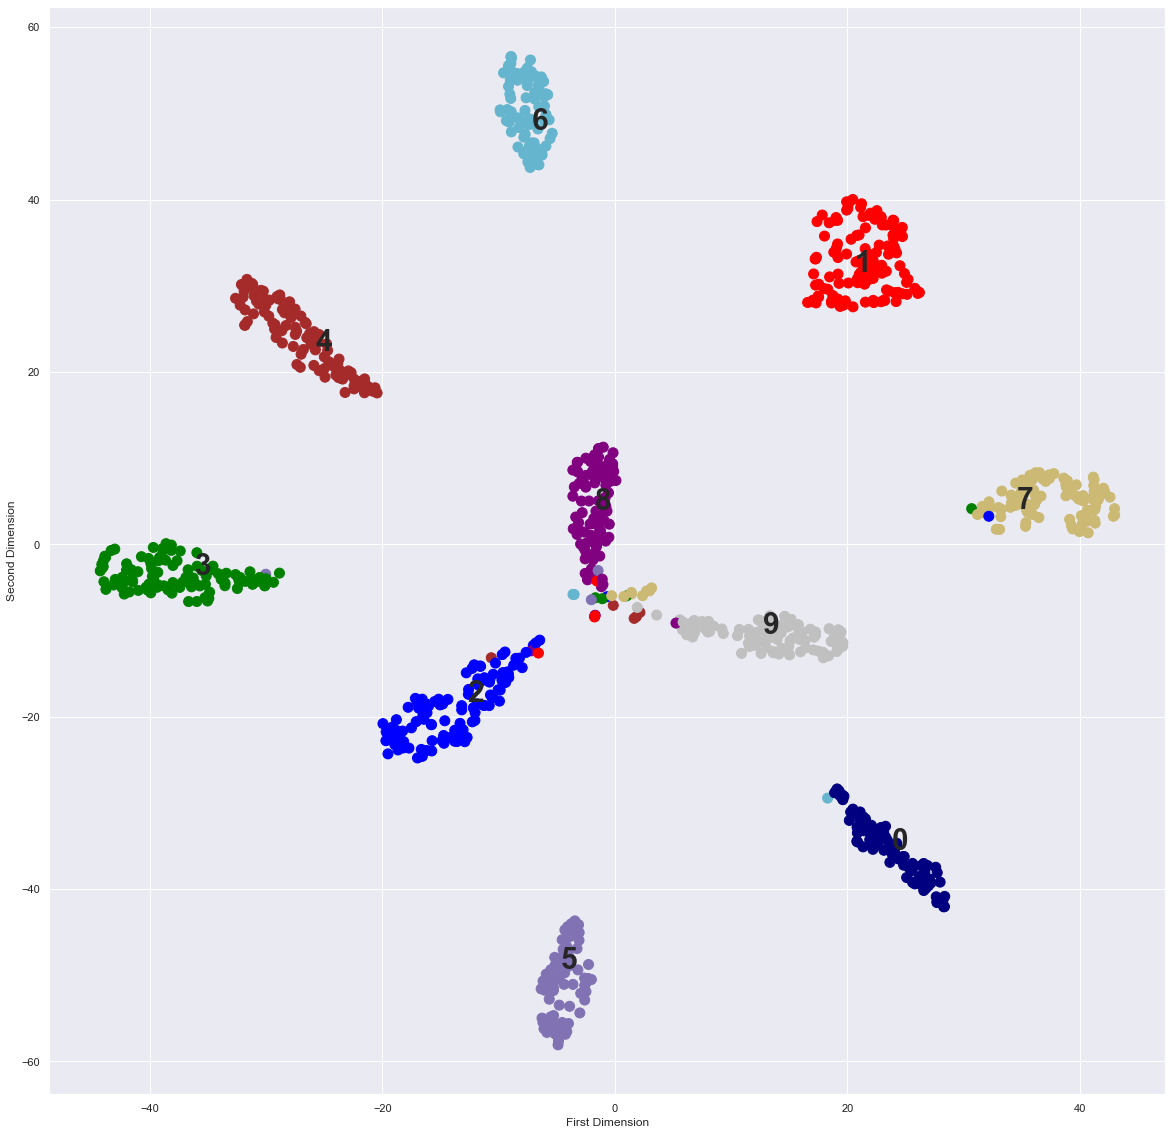

In [27]:
# Plotting the output of fourth hidden layer, for first 1000 test data points, reduced to two dimensions using tSNE
plotData(activations[3], 'tSNE')

#### Fifth Layer

<Figure size 432x288 with 0 Axes>

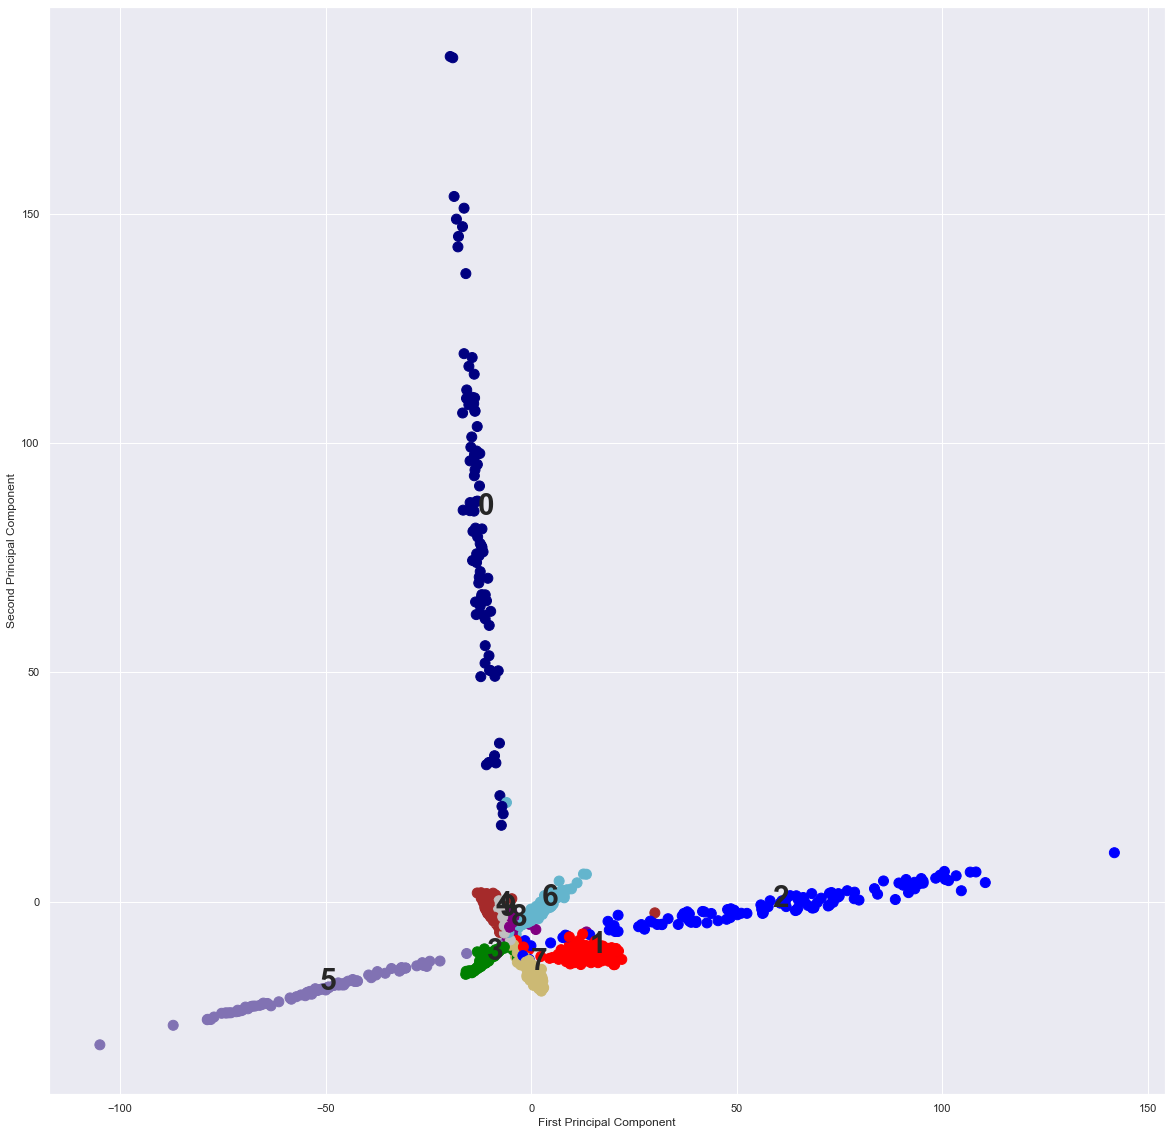

In [28]:
# Plotting the output of fifth hidden layer, for first 1000 test data points, reduced to two dimensions using PCA
plotData(activations[4], 'PCA')

<Figure size 432x288 with 0 Axes>

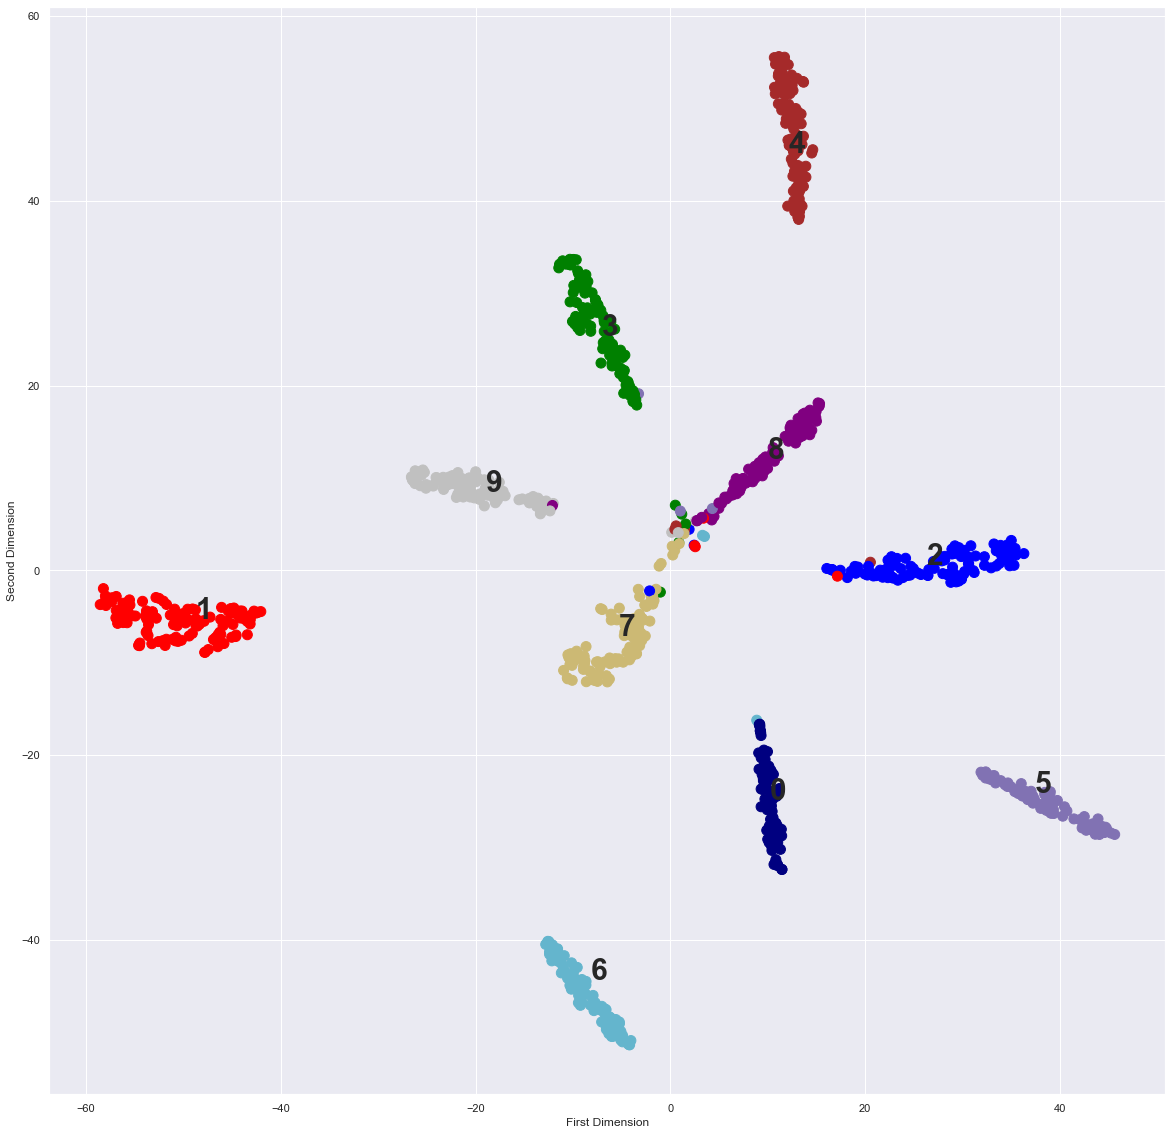

In [29]:
# Plotting the output of fifth hidden layer, for first 1000 test data points, reduced to two dimensions using tSNE
plotData(activations[4], 'tSNE')

#### Output Layer
The result of dimensionality reduction from PCA is really bad for visualization purpose. There's no clear sepreation between classes. On the other hand, the result from tSNE is very good. Each class does not only have a clear cluster but also cluster belonging to different classes are far away from each other which makes it very easy to classify samples. There are some points of one class in another class's region but I guess it could be attributed to the fact that the model is not 100% perfect. We can also see sub-clusters inside each cluster which I believe might have been caused by different way of writing the same digit. 

<Figure size 432x288 with 0 Axes>

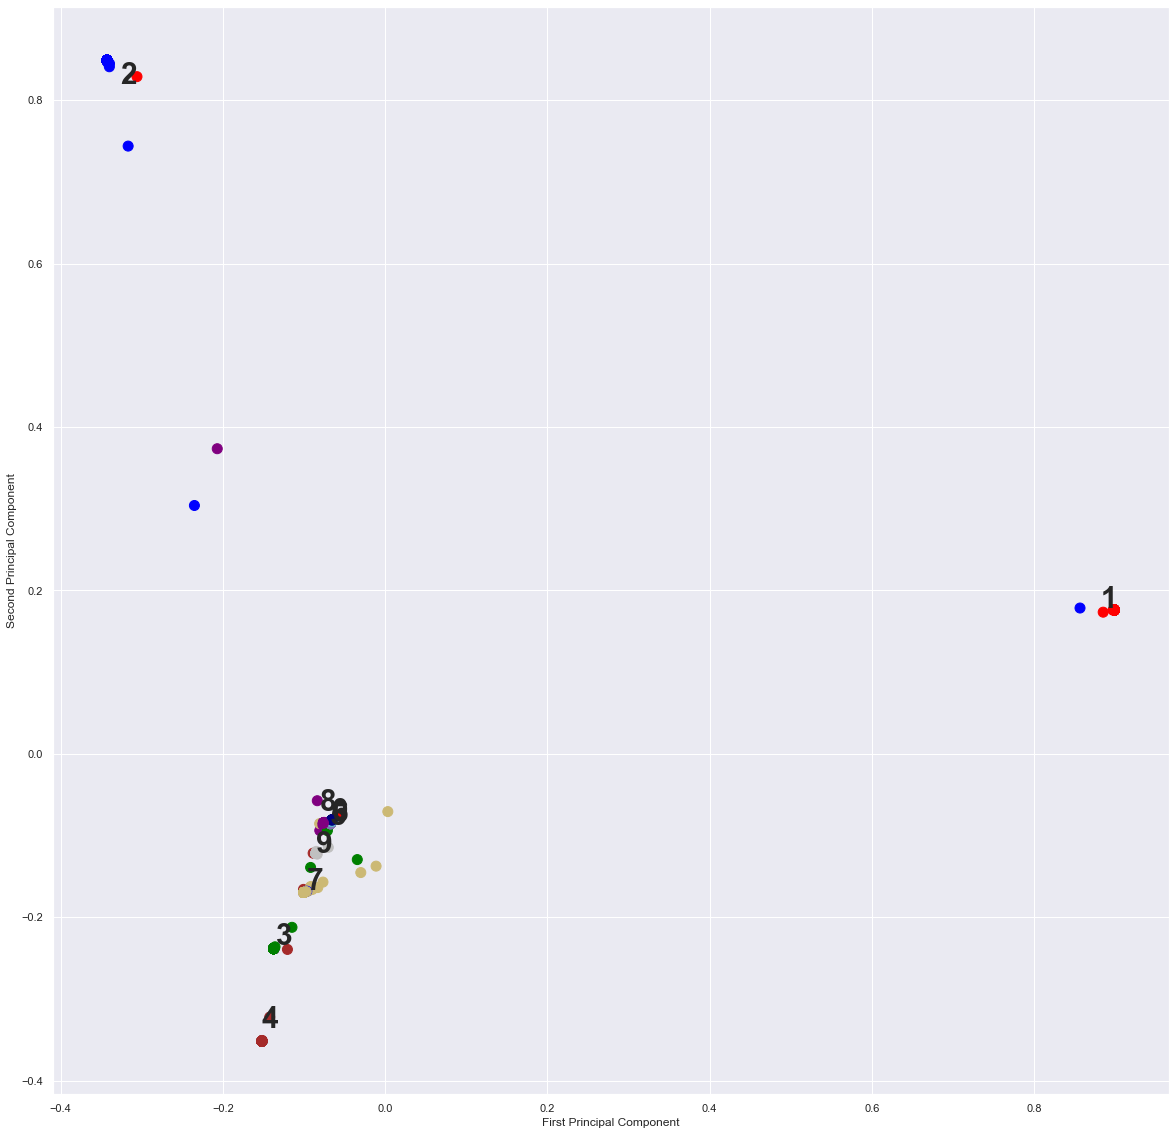

In [30]:
# Plotting the output of output layer, for first 1000 test data points, reduced to two dimensions using PCA
plotData(activations[5], 'PCA')

<Figure size 432x288 with 0 Axes>

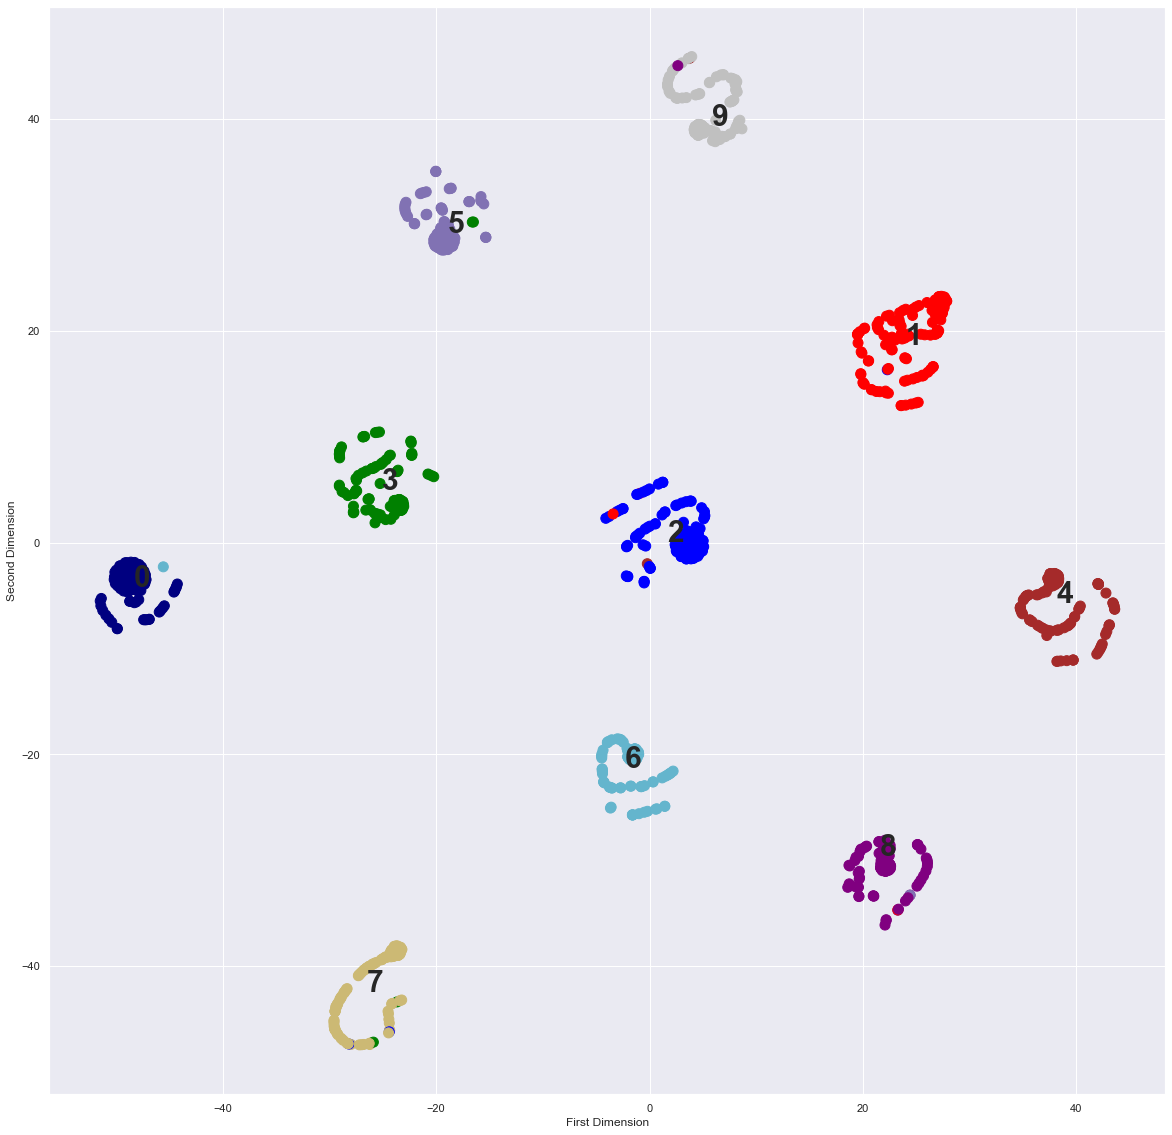

In [31]:
# Plotting the output of output layer, for first 1000 test data points, reduced to two dimensions using tSNE
plotData(activations[5], 'tSNE')

From the graphs above, we can conclude that tSNE is much better than PCA for visualizing high dimensional data. Though we must note here that tSNE also takes more time than PCA for dimensionality reduction. We can also see that clustering and seperation between classes becomes much better as we go deeper in the Neural Network. This further reinforces the fact the network is learning gloabal features/patterns as we go deeper into the network.

In [32]:
# Deleting the model
del model

## Problem 2: Speech Denoising Using Deep Learning  

In this problem, we are trying to remove the sound of eating chips from various sound signals. We are given the following set of audio signals for training and we have to train a deep neural network using this pair for denoising speech signals.  
#### Clean Training Signal
<audio src="train_clean_male.wav" controls>Audio file not availablle</audio>
#### Dirty Training Signal
<audio src="train_dirty_male.wav" controls>Audio file not availablle</audio>

In [33]:
# Loading the .wav files
# Ground Truth for training
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
# Unclean train file
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)
# Test 1
tn, sr=librosa.load('test_x_01.wav', sr=None)
A = librosa.stft(tn, n_fft=1024, hop_length=512)
# Test 2
t, sr=librosa.load('test_x_02.wav', sr=None)
B = librosa.stft(t, n_fft=1024, hop_length=512)

In [34]:
# Obtaining amplitude
y_data = np.abs(S).T
X_data = np.abs(X).T
# 90% of training data is used fr training and rest 10% for validation
X_train = X_data[:int(X_data.shape[0]*0.9)]
X_valid = X_data[int(X_data.shape[0]*0.9):]
y_train = y_data[:int(y_data.shape[0]*0.9)]
y_valid = y_data[int(y_data.shape[0]*0.9):]
# Test Data
X_test1 = np.abs(A).T
X_test2 = np.abs(B).T

In [35]:
# Defining model
model = Sequential()
model.add(Dense(1024, input_shape = (513,), activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(1024, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(513, activation = 'relu', kernel_initializer='he_normal'))

In [36]:
# Model Summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              526336    
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 513)               525825    
Total params: 2,101,761
Trainable params: 2,101,761
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Compiling model
model.compile(loss = 'mse', optimizer = Adam(), metrics = ['accuracy'])

In [38]:
# Training model
history = model.fit(X_train, y_train, epochs = 25, batch_size=128, validation_data = (X_valid, y_valid))

Train on 2213 samples, validate on 246 samples
Epoch 1/25
2213/2213 [==============================] - 1s 311us/step - loss: 0.0627 - acc: 0.1374 - val_loss: 0.0203 - val_acc: 0.2358
Epoch 2/25
2213/2213 [==============================] - 0s 52us/step - loss: 0.0270 - acc: 0.3050 - val_loss: 0.0160 - val_acc: 0.3171
Epoch 3/25
2213/2213 [==============================] - 0s 51us/step - loss: 0.0208 - acc: 0.3538 - val_loss: 0.0140 - val_acc: 0.3415
Epoch 4/25
2213/2213 [==============================] - 0s 52us/step - loss: 0.0175 - acc: 0.3954 - val_loss: 0.0128 - val_acc: 0.3537
Epoch 5/25
2213/2213 [==============================] - 0s 50us/step - loss: 0.0157 - acc: 0.4121 - val_loss: 0.0118 - val_acc: 0.3780
Epoch 6/25
2213/2213 [==============================] - 0s 50us/step - loss: 0.0144 - acc: 0.4225 - val_loss: 0.0113 - val_acc: 0.3740
Epoch 7/25
2213/2213 [==============================] - 0s 49us/step - loss: 0.0141 - acc: 0.4266 - val_loss: 0.0111 - val_acc: 0.3984
Epoch 8

In [39]:
# Getting output prediction for test files
out1 = model.predict(X_test1)
out2 = model.predict(X_test2)

In [40]:
# Adding phase information
stest1 = (A/X_test1.T)*out1.T
stest2 = (B/X_test2.T)*out2.T

In [41]:
# Performing Inverse Short Time Fourier Transform to get the output signal
sh_test1 = librosa.istft(stest1, hop_length=512)
sh_test2 = librosa.istft(stest2, hop_length=512)

In [42]:
# Storing the cleaned test files
librosa.output.write_wav('test_x_01_clean.wav', sh_test1, sr)
librosa.output.write_wav('test_x_02_clean.wav', sh_test2, sr)

## Cleaned Test Files
#### Test Audio 1
<audio src="test_x_01_clean.wav" controls>Audio file not availablle</audio>
#### Test Audio 2
<audio src="test_x_02_clean.wav" controls>Audio file not availablle</audio>

Even using such a simple network, we have acheived good results as we can observe listening to the cleaned test file above. The resulting speech contains some artificats which could be reduced by using better model/techniques.

In [43]:
# Deleting the model
del model